In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
import os
import cv2
import matplotlib.pyplot as plt

dataset: https://www.kaggle.com/ivanver/notebookafce69a0eb/data

In [2]:
MAIN_PATH = "../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"
IMG_WIDTH = 256
IMG_HEIGHT = 256
os.listdir(MAIN_PATH)

['no', 'yes']

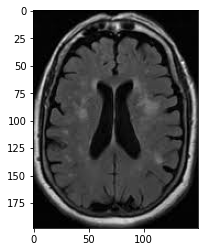

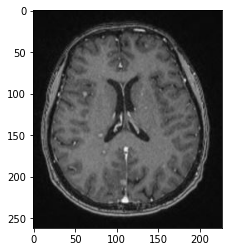

In [3]:
images_list = os.listdir(MAIN_PATH + "/no/")
for i in images_list[:2]:
    img = cv2.imread(MAIN_PATH + "/no/" + i)
    fig, ax = plt.subplots()
    ax.imshow(img)
   

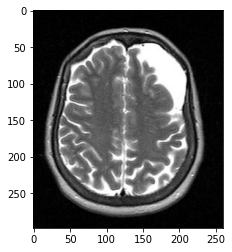

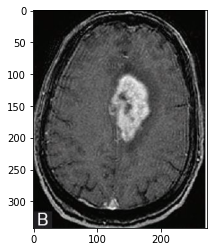

In [4]:
images_list = os.listdir(MAIN_PATH + "/yes/")
for i in images_list[:2]:
    img = cv2.imread(MAIN_PATH + "/yes/" + i)
    fig, ax = plt.subplots()
    ax.imshow(img)
   

In [5]:
train_img_ds = tf.data.Dataset.list_files(MAIN_PATH + '*/' + '*.jpg', shuffle=True)

2022-03-11 23:33:00.800199: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:33:00.886432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:33:00.887279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 23:33:00.889668: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
def preprocess_img(file_path):
    img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0
    parts = tf.strings.split(file_path, os.path.sep)[-2]
    label = [int(tf.equal(i, parts)) for i in ['no', 'yes']]
    return img, label

In [7]:
train_img_ds = train_img_ds.map(preprocess_img)
train_img_ds = train_img_ds.batch(40).prefetch(1)

In [8]:
for i in train_img_ds:
    print(i[1].shape)
    break

2022-03-11 23:33:03.425070: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(40, 2)


In [9]:
model = Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(16, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    Conv2D(16, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    Conv2D(32, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    Conv2D(64, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    Conv2D(128, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    Conv2D(256, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    Conv2D(512, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    MaxPooling2D(),
    Conv2D(1024, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    Conv2D(1024, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    MaxPooling2D(),
    Conv2D(2048, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    Conv2D(2048, 3, padding='same', kernel_initializer="he_normal", activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu', kernel_initializer="he_normal"),
    Dense(1024, activation='relu', kernel_initializer="he_normal"),
    Dense(1024, activation='relu', kernel_initializer="he_normal"),
    Dense(1024, activation='relu', kernel_initializer="he_normal"),
    Dense(512, activation='relu', kernel_initializer="he_normal"),
    Dense(512, activation='relu', kernel_initializer="he_normal"),
    Dense(512, activation='relu', kernel_initializer="he_normal"),
    Dense(512, activation='relu', kernel_initializer="he_normal"),
    Dense(512, activation='relu', kernel_initializer="he_normal"),
    Dense(256, activation='relu', kernel_initializer="he_normal"),
    Dense(256, activation='relu', kernel_initializer="he_normal"),
    Dense(256, activation='relu', kernel_initializer="he_normal"),
    Dense(128, activation='relu', kernel_initializer="he_normal"),
    Dense(64, activation='relu', kernel_initializer="he_normal"),
    Dense(32, activation='relu', kernel_initializer="he_normal"),
    Dense(2, activation='softmax')
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_img_ds, 
    epochs=60
)

Epoch 1/60


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'
2022-03-11 23:33:06.618873: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


5/5 [==============================] - 11s 298ms/step - loss: 0.7458 - accuracy: 0.5263
Epoch 2/60
5/5 [==============================] - 1s 109ms/step - loss: 0.7234 - accuracy: 0.5965
Epoch 3/60
5/5 [==============================] - 1s 110ms/step - loss: 0.7056 - accuracy: 0.5380
Epoch 4/60
5/5 [==============================] - 1s 111ms/step - loss: 0.6867 - accuracy: 0.5439
Epoch 5/60
5/5 [==============================] - 1s 119ms/step - loss: 0.6456 - accuracy: 0.6959
Epoch 6/60
5/5 [==============================] - 1s 109ms/step - loss: 0.5869 - accuracy: 0.7485
Epoch 7/60
5/5 [==============================] - 1s 110ms/step - loss: 0.5831 - accuracy: 0.7076
Epoch 8/60
5/5 [==============================] - 1s 109ms/step - loss: 0.6154 - accuracy: 0.6959
Epoch 9/60
5/5 [==============================] - 1s 111ms/step - loss: 0.5531 - accuracy: 0.7719
Epoch 10/60
5/5 [==============================] - 1s 110ms/step - loss: 0.4907 - accuracy: 0.7778
Epoch 11/60
5/5 [============

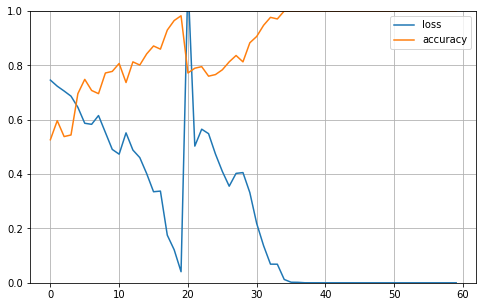

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
no_img_list = "../input/brain-mri-images-for-brain-tumor-detection/no/"
yes_img_list = "../input/brain-mri-images-for-brain-tumor-detection/yes/"

In [14]:
no_img_list_dir = os.listdir(MAIN_PATH + 'no/')
yes_img_list_dir = os.listdir(MAIN_PATH + 'yes/')

In [15]:
def proccess(dir):
    img = cv2.imread(dir)
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
    return img / 255.0 

In [16]:
no_img_list_array = np.array([proccess(no_img_list + i) for i in no_img_list_dir])
yes_img_list_array = np.array([proccess(yes_img_list + i) for i in yes_img_list_dir])

In [17]:
result_no = model.predict(no_img_list_array[:20])
result_yes = model.predict(yes_img_list_array[:20])

In [18]:
np.round(result_no)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
np.round(result_yes)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)